Loading and preprocessing the data

In [11]:
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def load_imdb_data(data_dir):
    texts = []
    labels = []

    for label_type in ['pos', 'neg']:
        dir_name = os.path.join(data_dir, label_type)
        for fname in os.listdir(dir_name):
            if fname.endswith(".txt"):
                with open(os.path.join(dir_name, fname), encoding="utf8") as f:
                    texts.append(f.read())
                labels.append(1 if label_type == 'pos' else 0)
    
    return texts, labels

# Example usage
train_texts, train_labels = load_imdb_data("data/train")
test_texts, test_labels = load_imdb_data("data/test")

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    train_texts, train_labels, test_size=0.2, random_state=42
)

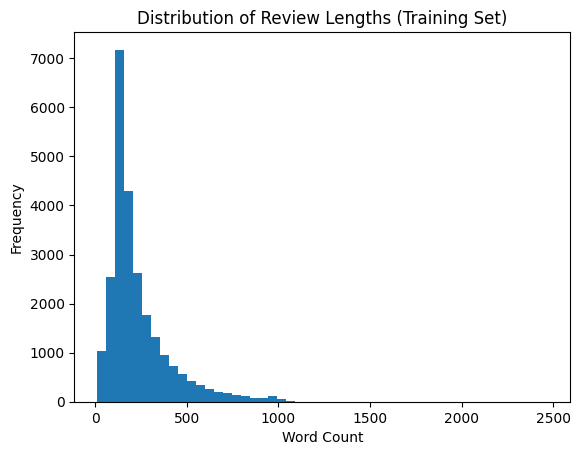

In [15]:
plt.hist([len(review.split()) for review in train_texts], bins=50)
plt.title("Distribution of Review Lengths (Training Set)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [8]:
# 4. Preprocess with TF-IDF
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=10000)

X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_texts)

In [ ]:
# 5. Train and Evaluate kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
y_pred_knn = knn.predict(X_test_vec)
print("kNN Results:")
print(classification_report(test_labels, y_pred_knn))

📊 kNN Results:
              precision    recall  f1-score   support

           0       0.61      0.73      0.67     12500
           1       0.67      0.55      0.60     12500

    accuracy                           0.64     25000
   macro avg       0.64      0.64      0.63     25000
weighted avg       0.64      0.64      0.63     25000



Learning curve for the KNN using 100 - the size of the training stuff

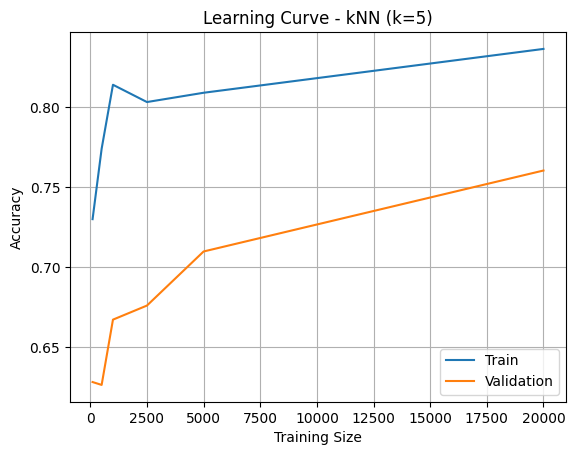

In [14]:
sizes = [100, 500, 1000, 2500, 5000, len(X_train)]
train_scores = []
val_scores = []

for size in sizes:
    X_sub = X_train[:size]
    y_sub = y_train[:size]
    X_sub_vec = vectorizer.transform(X_sub)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_sub_vec, y_sub)

    train_scores.append(model.score(X_sub_vec, y_sub))
    val_scores.append(model.score(X_val_vec, y_val))

plt.plot(sizes, train_scores, label="Train")
plt.plot(sizes, val_scores, label="Validation")
plt.title("Learning Curve - kNN (k=5)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

Regularization analysis for kNN

In [16]:
# K values for testing
k_vals =[1, 3, 5, 10, 15, 20]

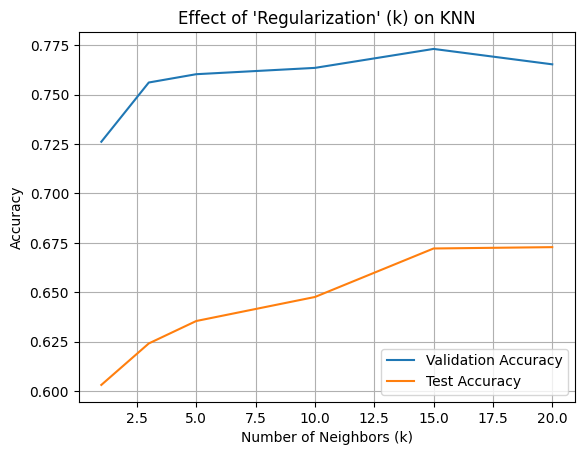

In [17]:
val_scores = []
test_scores = []

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_vec, y_train)
    val_scores.append(knn.score(X_val_vec, y_val))
    test_scores.append(knn.score(X_test_vec, test_labels))

# Plotting
plt.plot(k_vals, val_scores, label="Validation Accuracy")
plt.plot(k_vals, test_scores, label="Test Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Effect of 'Regularization' (k) on KNN")
plt.legend()
plt.grid()
plt.show()

In [10]:
# 6. Train and Evaluate Logistic Regression
logreg = LogisticRegression(C=1.0, max_iter=1000)
logreg.fit(X_train_vec, y_train)

y_pred_logreg = logreg.predict(X_test_vec)
print("📊 Logistic Regression Results:")
print(classification_report(test_labels, y_pred_logreg))

📊 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



Logistic regression plotted

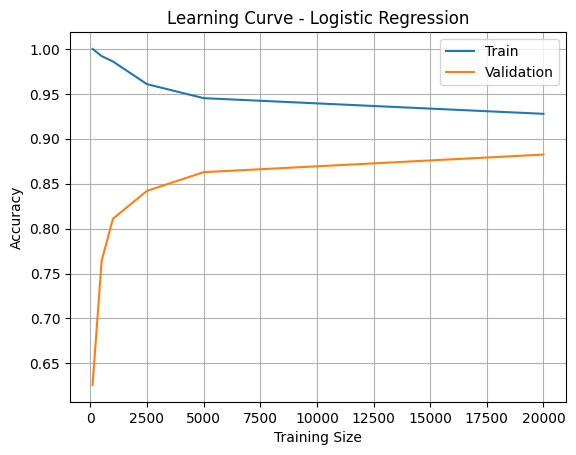

In [13]:
# Ensure arrays for slicing
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val_vec = vectorizer.transform(X_val)

train_sizes = [100, 500, 1000, 2500, 5000, len(X_train)]
train_scores = []
val_scores = []

for size in train_sizes:
    X_sub = X_train[:size]
    y_sub = y_train[:size]
    X_sub_vec = vectorizer.transform(X_sub)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_sub_vec, y_sub)

    train_scores.append(model.score(X_sub_vec, y_sub))
    val_scores.append(model.score(X_val_vec, y_val))

plt.plot(train_sizes, train_scores, label="Train")
plt.plot(train_sizes, val_scores, label="Validation")
plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

Regularization variation for logistic regression model

In [19]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

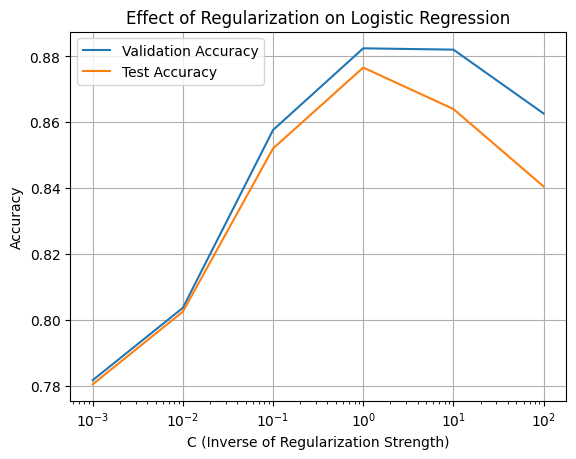

In [20]:
val_scores = []
test_scores = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train_vec, y_train)

    val_scores.append(model.score(X_val_vec, y_val))
    test_scores.append(model.score(X_test_vec, test_labels))

# Plotting
plt.plot(C_values, val_scores, label="Validation Accuracy")
plt.plot(C_values, test_scores, label="Test Accuracy")
plt.xscale('log')  # better spacing on log scale
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Effect of Regularization on Logistic Regression")
plt.legend()
plt.grid()
plt.show()